In [105]:
# !pip install pandas numpy scikit-learn seaborn matplotlib missingno nltk imbalanced-learn

In [106]:
# import sys
# print(sys.version)

In [107]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as misno
import re
import string
# from imblearn.over_sampling import SMOTE

# Import NLTK(Natural Language Toolkit) for text processing
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [108]:
data = pd.read_csv("Dataset.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Group                     1267 non-null   int64 
 1   Sex                       1267 non-null   int64 
 2   Age                       1267 non-null   int64 
 3   Patients number per hour  1267 non-null   int64 
 4   Arrival mode              1267 non-null   int64 
 5   Injury                    1267 non-null   int64 
 6   Chief_complain            1267 non-null   object
 7   Mental                    1267 non-null   int64 
 8   Pain                      1267 non-null   int64 
 9   NRS_pain                  1267 non-null   object
 10  SBP                       1267 non-null   object
 11  DBP                       1267 non-null   object
 12  HR                        1267 non-null   object
 13  RR                        1267 non-null   object
 14  BT                      

ConversionError: Failed to convert value(s) to axis units: array(['right ocular pain', 'right forearm burn', 'arm pain, Lt', ...,
       'dizziness', 'Sensory, Decreased', 'orthopnea'], dtype=object)

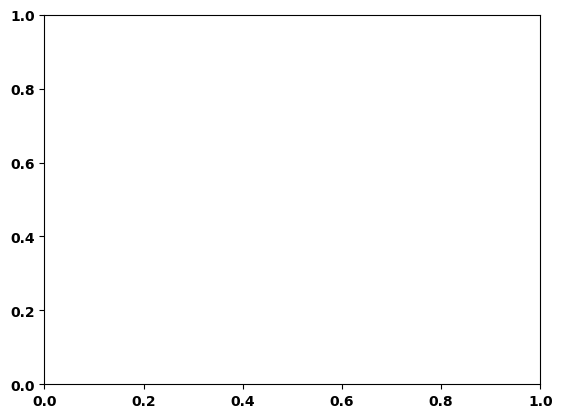

In [109]:
import matplotlib.pyplot as plt
plt.hist(data, bins='auto', alpha=0.7,  edgecolor='black')
plt.title('Histogram of Your Data')
plt.show()


#### Data Preprocessing

In [ ]:
# data = pd.read_csv("Dataset.csv")

columns_to_drop = ['Chief_complain', 'Diagnosis in ED','Error_group', 'KTAS duration_min', 'mistriage','Group','Patients number per hour','Length of stay_min']
data.drop(columns=columns_to_drop, inplace=True)

data = data.rename(columns={'Disposition':'hospitalized','Arrival mode':'arrivalmode'})
data.columns = [col.lower() for col in data.columns]

data['hospitalized'] = data['hospitalized'].replace({1:0, 2:1, 3:1, 4:0,5:1,6:0,7:1})
data['sex'] = data['sex'].replace({1:0,2:1})
data['injury'] = data['injury'].replace({1:0,2:1})
data = data[[col for col in data.columns if col != 'hospitalized'] + ['hospitalized']]
data.head()

In [ ]:
# # Create a pairplot
# sns.set(style="ticks")
# sns.pairplot(data, diag_kind="kde", hue="hospitalized")

# # Show the plot
# plt.show()

In [ ]:
# List of columns to clean and convert

columns_to_clean = ['nrs_pain', 'sbp', 'dbp', 'hr', 'rr', 'bt', 'saturation']
for column in columns_to_clean:
    data[column] = data[column].replace({'#BOŞ!': np.NaN, '??': np.NaN}).astype(float)

data.info()

In [ ]:
def missingValues(data):
    variables_NA = [col for col in data.columns if data[col].isnull().sum() > 0]
    n_miss = data[variables_NA].isnull().sum().sort_values(ascending=False)
    ratio = (data[variables_NA].isnull().sum() / data.shape[0] * 100).sort_values(ascending=False)
    missing_data = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    return missing_data

missing_data = missingValues(data)

def columns_with_null_values(data):
    columns_with_na = data.columns[data.isnull().any()].tolist()
    return columns_with_na

columns_with_null = columns_with_null_values(data)

print(missing_data)
    
# Create a bar plot for missing values
plt.figure(figsize=(10, 6))
bars = plt.bar(missing_data.index, missing_data['ratio'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Values by Feature')
plt.xticks(rotation=90)

# Annotate the bars with 'n_miss' and 'ratio' values
for bar, n_miss, ratio in zip(bars, missing_data['n_miss'], missing_data['ratio']):
        plt.text(bar.get_x() + bar.get_width() / 2-0.15, bar.get_height() + 1, f'{ratio}%', fontsize=9, color='black')

plt.tight_layout()
plt.show()

In [ ]:
for column in data.columns:
    # Check if the column is non-numeric (categorical or discrete)
    if data[column].dtype == "object" or data[column].dtype == "int64":
        # Count the occurrences of each unique value in the column
        value_counts = data[column].value_counts()

        # Create a bar plot
        plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
        sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, palette="tab10", legend=False)
        plt.title(f'Bar Plot for {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)  # Rotate x-axis labels if necessary

        # Show the plot
        plt.show()

In [ ]:
# Specify the columns you want to plot
columns_to_plot = data.columns

# Set the number of columns per row
columns_per_row = 2

# Calculate the number of rows needed
num_rows = (len(columns_to_plot) // columns_per_row) + 1

# Create subplots
fig, ax = plt.subplots(num_rows, columns_per_row, figsize=(15, num_rows * 3))

# Flatten the axis array to make indexing easier
ax = ax.flatten()

# Loop through columns and create subplots
for i, column in enumerate(columns_to_plot):
    sns.countplot(x=column, data=data, ax=ax[i])
    ax[i].set_title(f'Count Plot for {column}')
    ax[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# !pip install missingno

misno.bar(data)


# # Define custom colors for missing and non-missing values
# missing_color = (0.8, 0.2, 0.2)  # Red color for missing values
# existing_color = (0.2, 0.4, 0.8)  # Blue color for non-missing values

# # Create a colorful missing values bar plot
# misno.bar(data, color=(existing_color, missing_color))

# # Set custom labels for the plot
# plt.xlabel("Features", fontsize=14)
# plt.ylabel("Percentage of Missing Values", fontsize=14)
# plt.title("Missing Values Matrix", fontsize=16)

# # Show the plot
# plt.show()

In [ ]:
data.isnull().values.any()

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
sns.boxplot(x=data['saturation'])
plt.show()

In [ ]:
correlation_matrix = data.corr(method='pearson')

plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
def impute_nan(df,variable):    
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [ ]:
data_imputation =["nrs_pain","rr","hr","sbp","dbp","bt"]

for i in data_imputation:
    impute_nan(data,i)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['nrs_pain'].plot(kind='kde', ax=ax)
# data.nrs_pain_median.plot(kind='kde', ax=ax, color='red')
data.nrs_pain_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['sbp_random'].plot(kind='kde', ax=ax)
# data.nrs_pain_median.plot(kind='kde', ax=ax, color='red')
data.sbp_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [ ]:
data["saturation"] = data.groupby([ "ktas_expert"])["saturation"].transform(lambda x: x.fillna(x.mode()[0]))
data.isnull().values.any()

In [ ]:
# for column in data.columns:
#     # Check if the column is non-numeric (categorical or discrete)
#     if data[column].dtype == "object" or data[column].dtype == "int64":
#         # Count the occurrences of each unique value in the column
#         value_counts = data[column].value_counts()

#         # Create a bar plot
#         plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
#         sns.barplot(x=value_counts.index, y=value_counts.values)
#         plt.title(f'Bar Plot for {column}')
#         plt.xlabel(column)
#         plt.ylabel('Count')
#         plt.xticks(rotation=45)  # Rotate x-axis labels if necessary

#         # Show the plot
#         plt.show()

In [ ]:
# strings = [x for x in data['sbp'] if type(x) is str]
# len(strings)

In [ ]:
data['nrs_pain'] = data['nrs_pain'].fillna(data['nrs_pain'].median())
data['sbp'] = data['sbp'].fillna(data['sbp'].median())

data['dbp'] = data['dbp'].fillna(data['dbp'].median())
data['hr'] = data['hr'].fillna(data['hr'].median())
data['rr'] = data['rr'].fillna(data['rr'].median())

data['bt'] = data['bt'].fillna(data['bt'].median())
data['saturation'] = data['saturation'].fillna(data['saturation'].median())
misno.bar(data)

In [ ]:
data.drop(columns=data_imputation, inplace=True)

In [ ]:
correlation_matrix = data.corr(method='pearson')

plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
count = data['hospitalized'].value_counts()
print(count)

In [ ]:
data.isnull().values.any()

#### Model Training 

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X = data.drop('hospitalized', axis=1)
y = data[['hospitalized']]


smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state = 72)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 62)



# NB = GaussianNB().fit(X_train, y_train)


# svm = SVC(random_state=357,gamma='auto').fit(X_train, y_train)






In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2

# Your code for reading the dataset remains the same.
data = pd.read_csv("Dataset.csv")


columns_to_drop = ['Chief_complain', 'Diagnosis in ED','Error_group', 'KTAS duration_min', 'mistriage','Group','Patients number per hour','Length of stay_min']

data.drop(columns=columns_to_drop, inplace=True)
data = data.rename(columns={'Disposition':'hospitalized','Arrival mode':'arrivalmode'})
data.columns = [col.lower() for col in data.columns]
data.head()
columns_to_clean = ['nrs_pain', 'sbp', 'dbp', 'hr', 'rr', 'bt', 'saturation']

# Loop through the columns and apply cleaning and conversion
for column in columns_to_clean:
    data[column] = data[column].replace({'#BOŞ!': np.NaN, '??': np.NaN}).astype(float)

# Perform one-hot encoding for categorical features
categorical_features = ['arrivalmode', 'sex', 'injury', 'ktas_expert']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Feature scaling for numerical features
numerical_features = ['nrs_pain', 'sbp', 'dbp', 'hr', 'rr', 'bt', 'saturation']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])
data.isnull().values.any()
misno.bar(data)

In [ ]:
# Feature selection using chi-squared test
X = data.drop('hospitalized', axis=1)
y = data['hospitalized']
selector = SelectKBest(chi2, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
data = pd.concat([data['hospitalized'], data[selected_features]], axis=1)

# Split the dataset into training and testing sets
X_resampled, y_resampled = smote.fit_resample(data.drop('hospitalized', axis=1), data['hospitalized'])
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=72)

# Hyperparameter tuning for SVM (as shown in the previous response)

# Model training and evaluation (as shown in the previous response)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
# Hyperparameter tuning for SVM
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm = SVC(random_state=357)
svm_grid = GridSearchCV(svm, param_grid, cv=5)
svm_grid.fit(X_train, y_train)

# Get the best SVM model from the grid search
best_svm = svm_grid.best_estimator_

# Train the best SVM model
best_svm.fit(X_train, y_train)

# Make predictions
svm_predictions = best_svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, svm_predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

In [ ]:

X_resampled.info()
y_resampled.info()


count = y_resampled['hospitalized'].value_counts()
print(count)

In [ ]:
NB = GaussianNB().fit(X_resampled, y_resampled)


svm = SVC(random_state=357,gamma='auto').fit(X_resampled, y_resampled)

In [ ]:
from sklearn.metrics import accuracy_score
models = [
          ("NB", NB),
          ("SVM", svm),
         ]

for name, model in models:
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    msg = "%s: (%f)" % (name, acc)
    print(msg)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred_NB = NB.predict(X_test)
y_pred_SVM = svm.predict(X_test)

# Calculate the accuracy of each model
accuracy_NB = accuracy_score(y_test, y_pred_NB)
accuracy_SVM = accuracy_score(y_test, y_pred_SVM)

# Multiply the accuracy by 100 to get the percentage accuracy
percentage_accuracy_NB = accuracy_NB * 100
percentage_accuracy_SVM = accuracy_SVM * 100

# Print the percentage accuracy of each model
print("Percentage accuracy of NB:", percentage_accuracy_NB)
print("Percentage accuracy of SVC:", percentage_accuracy_SVM)
